In [3]:
# mysql - python   pymysql

!pip install pymysql

     ---------------------------------------- 43.8/43.8 kB 1.1 MB/s eta 0:00:00


In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import math
import pymysql
pd.set_option("display.max_column", None)

In [2]:
# make sure to create your database before hand

dbcon = pymysql.connect(host="localhost", user="root", password="mysql", database="breast_cancer_db")

In [3]:
dbcon

In [4]:
# loading data
pd.read_sql_query(""" select * from breast_cancer where diagnosis='B' """, dbcon, parse_dates=True)


C:\Users\rivil\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           B       13.540         14.36           87.46      566.3   
1           B       13.080         15.71           85.63      520.0   
2           B        9.504         12.44           60.34      273.9   
3           B       13.030         18.42           82.61      523.8   
4           B        8.196         16.84           51.71      201.9   
..        ...          ...           ...             ...        ...   
352         B       14.590         22.68           96.39      657.1   
353         B       11.510         23.93           74.52      403.5   
354         B       14.050         27.15           91.38      600.4   
355         B       11.200         29.37           70.67      386.0   
356         B        7.760         24.54           47.92      181.0   

     smoothness_mean  
0            0.09779  
1            0.10750  
2            0.10240  
3            0.08983  
4            0.08600  
..               ...  
352          0.08473  
353          0.09261  
354          0.09929  
355          0.07449  
356          0.05263  

[357 rows x 6 columns]

In [5]:
diagnose="B"

In [6]:
# load with variable
df = pd.read_sql_query(""" select * from breast_cancer where diagnosis='"""+diagnose+"""' """, dbcon, parse_dates=True)
df

C:\Users\rivil\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           B       13.540         14.36           87.46      566.3   
1           B       13.080         15.71           85.63      520.0   
2           B        9.504         12.44           60.34      273.9   
3           B       13.030         18.42           82.61      523.8   
4           B        8.196         16.84           51.71      201.9   
..        ...          ...           ...             ...        ...   
352         B       14.590         22.68           96.39      657.1   
353         B       11.510         23.93           74.52      403.5   
354         B       14.050         27.15           91.38      600.4   
355         B       11.200         29.37           70.67      386.0   
356         B        7.760         24.54           47.92      181.0   

     smoothness_mean  
0            0.09779  
1            0.10750  
2            0.10240  
3            0.08983  
4            0.08600  
..               ...  
352          0.08473  
353          0.09261  
354          0.09929  
355          0.07449  
356          0.05263  

[357 rows x 6 columns]

In [24]:
# load entire query variable
df = pd.read_sql_query(""" select * from breast_cancer """, dbcon, parse_dates=True)
df

C:\Users\rivil\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  
0            0.11840  
1            0.08474  
2            0.10960  
3            0.14250  
4            0.10030  
..               ...  
564          0.11100  
565          0.09780  
566          0.08455  
567          0.11780  
568          0.05263  

[569 rows x 6 columns]

In [25]:
df[df["diagnosis"] == "M"]

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
563         M        20.92         25.09          143.00     1347.0   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  
0            0.11840  
1            0.08474  
2            0.10960  
3            0.14250  
4            0.10030  
..               ...  
563          0.10990  
564          0.11100  
565          0.09780  
566          0.08455  
567          0.11780  

[212 rows x 6 columns]

In [26]:
map_dict={"M":0,"B":1}
df["diagnosis"] = df["diagnosis"].map(map_dict)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            0        17.99         10.38          122.80     1001.0   
1            0        20.57         17.77          132.90     1326.0   
2            0        19.69         21.25          130.00     1203.0   
3            0        11.42         20.38           77.58      386.1   
4            0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          0        21.56         22.39          142.00     1479.0   
565          0        20.13         28.25          131.20     1261.0   
566          0        16.60         28.08          108.30      858.1   
567          0        20.60         29.33          140.10     1265.0   
568          1         7.76         24.54           47.92      181.0   

     smoothness_mean  
0            0.11840  
1            0.08474  
2            0.10960  
3            0.14250  
4            0.10030  
..               ...  
564          0.11100  
565          0.09780  
566          0.08455  
567          0.11780  
568          0.05263  

[569 rows x 6 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        569 non-null    int64  
 1   radius_mean      569 non-null    float64
 2   texture_mean     569 non-null    float64
 3   perimeter_mean   569 non-null    float64
 4   area_mean        569 non-null    float64
 5   smoothness_mean  569 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [33]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.627417    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      1.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  
count       569.000000  
mean          0.096360  
std           0.014064  
min           0.052630  
25%           0.086370  
50%           0.095870  
75%           0.105300  
max           0.163400

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

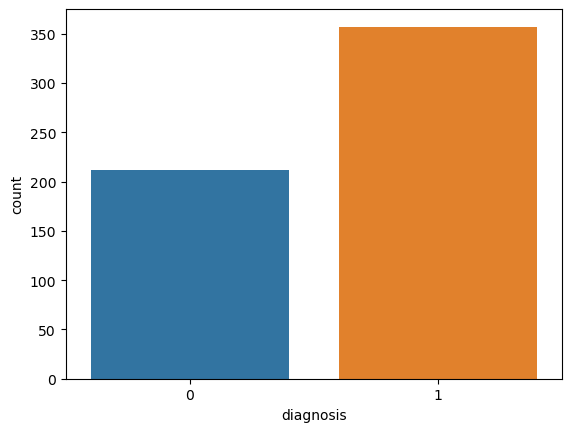

In [34]:
sns.countplot(x="diagnosis",data=df)

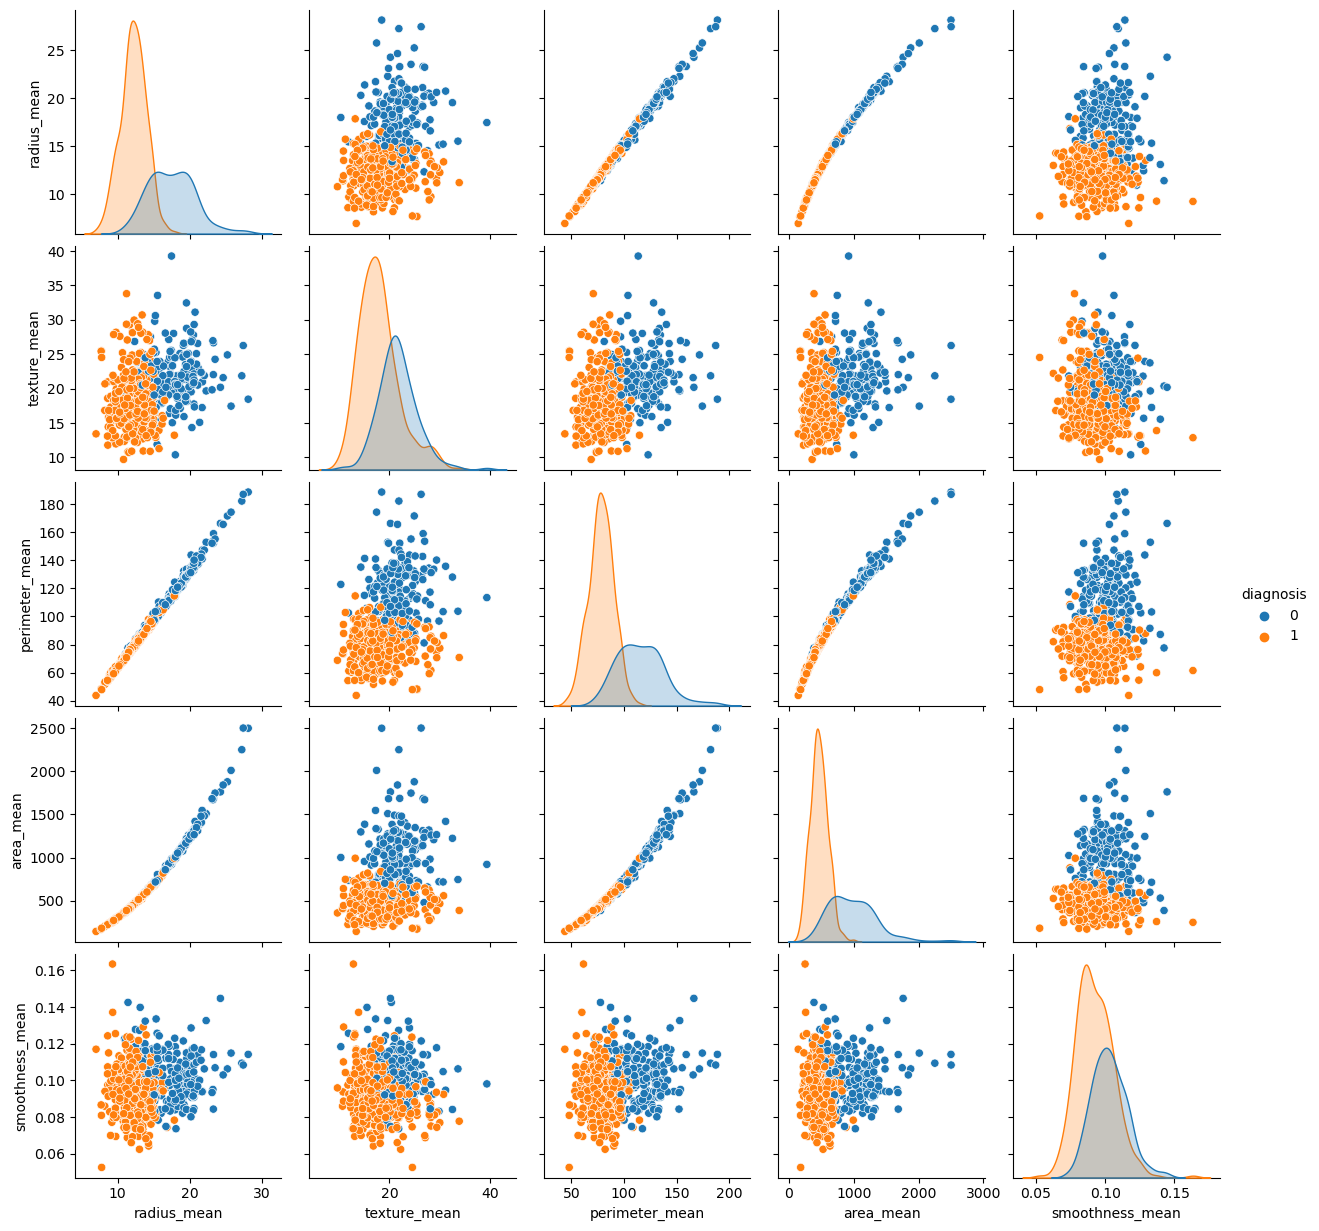

In [35]:
sns.pairplot(df,hue='diagnosis')

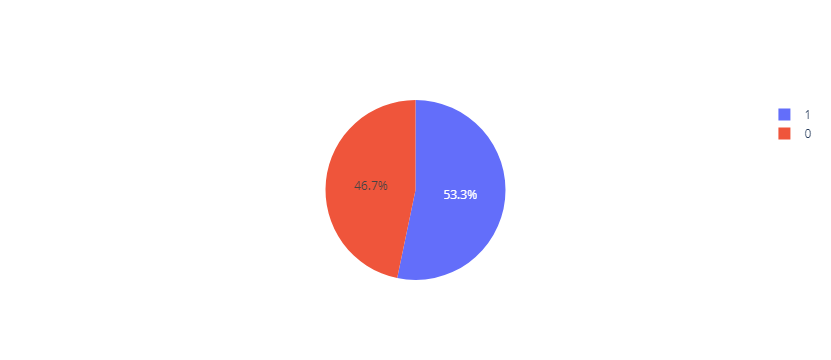

In [38]:
labels=df.diagnosis
values = df.perimeter_mean
fig=go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [39]:
# Model training
x=df.drop(columns=['diagnosis'])
y=df['diagnosis']

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455, 5) (114, 5) (455,) (114,)


In [42]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

#predictions
y_rfc_predict = rfc.predict(x_test)

print("accuracy=", accuracy_score(y_test, y_rfc_predict))

accuracy= 0.9473684210526315


# Reading multiple tables

In [43]:
dbcon = pymysql.connect(host="localhost", user="root", password="mysql", database="classicmodels")

#### example of innerjoins in sql

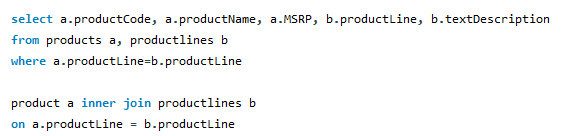

In [44]:
pd.read_sql_query(""" select a.productCode, a.productName, a.MSRP, b.productLine, b.textDescription 
from products a, productlines b
where a.productLine=b.productLine """, dbcon, parse_dates=True)

C:\Users\rivil\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



productCode                       productName    MSRP   productLine  \
0      S10_1949          1952 Alpine Renault 1300  214.30  Classic Cars   
1      S10_4757               1972 Alfa Romeo GTA  136.00  Classic Cars   
2      S10_4962            1962 LanciaA Delta 16V  147.74  Classic Cars   
3      S12_1099                 1968 Ford Mustang  194.57  Classic Cars   
4      S12_1108                 2001 Ferrari Enzo  207.80  Classic Cars   
..          ...                               ...     ...           ...   
105    S24_3816          1940 Ford Delivery Sedan   83.86  Vintage Cars   
106    S24_3969  1936 Mercedes Benz 500k Roadster   41.03  Vintage Cars   
107    S24_4258             1936 Chrysler Airflow   97.39  Vintage Cars   
108    S32_4289          1928 Ford Phaeton Deluxe   68.79  Vintage Cars   
109    S50_1341      1930 Buick Marquette Phaeton   43.64  Vintage Cars   

                                       textDescription  
0    Attention car enthusiasts: Make your wildest c...  
1    Attention car enthusiasts: Make your wildest c...  
2    Attention car enthusiasts: Make your wildest c...  
3    Attention car enthusiasts: Make your wildest c...  
4    Attention car enthusiasts: Make your wildest c...  
..                                                 ...  
105  Our Vintage Car models realistically portray a...  
106  Our Vintage Car models realistically portray a...  
107  Our Vintage Car models realistically portray a...  
108  Our Vintage Car models realistically portray a...  
109  Our Vintage Car models realistically portray a...  

[110 rows x 5 columns]

In [ ]:


con = pymysql.connect('localhost', 'user7',
    's$cret', 'testdb')

try:

    with con.cursor() as cur:

        cur.execute('SELECT VERSION()')

        version = cur.fetchone()

        print(f'Database version: {version[0]}')

finally:

    con.close()

In [ ]:
try:
    dbcon = pymysql.connect(host="localhost", user="root", password="mysql", database="breast_cancer_db")

except pymysql.error.OperationalError as e:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cnx.close()

In [45]:
# roman to int numbers

class py_solution:
    def roman_to_int(self, s):
        rom_val = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
        int_val = 0
        for i in range(len(s)):
            if i > 0 and rom_val[s[i]] > rom_val[s[i - 1]]:
                int_val += rom_val[s[i]] - 2 * rom_val[s[i - 1]]
            else:
                int_val += rom_val[s[i]]
        return int_val


In [46]:
print(py_solution().roman_to_int('III'))
print(py_solution().roman_to_int("LVIII"))
print(py_solution().roman_to_int("MCMXCIV"))
print(py_solution().roman_to_int('MMMCMLXXXVI'))
print(py_solution().roman_to_int('MMMM'))
print(py_solution().roman_to_int('C'))

3
58
1994
3986
4000
100


In [68]:
# find the shortest prefix
# Input: strs = ["flower","flow","flight"]
# Output: "fl"

from typing import List

class Solution:
    # list of strings - outputs string
    def longestCommonPrefix(self, strs: List[str]) -> str:    

        if not strs:                        # check for null list to avoid calculations
            return "null list"
        shortest = min(strs,key=len)        # find the shortest string in the list by using the key=len
                                            # this would be the longest prefix
        for i, ch in enumerate(shortest):   # i can not be > than No of charactes in the shortest string
                                            # ch is a string corresponding to the i character of the shortest string
            for other in strs:              # loop iterating the list
                if other[i] != ch:          # check character by character until it is different
                    if i>0:
                        return shortest[:i] # return the shortest prefix
                    else:
                        return "no common prefix"
                


In [70]:
strs = ["flower","flow","flight"]
# strs = ["dog","racecar","car"]
# strs = []
Solution().longestCommonPrefix(strs)

'fl'

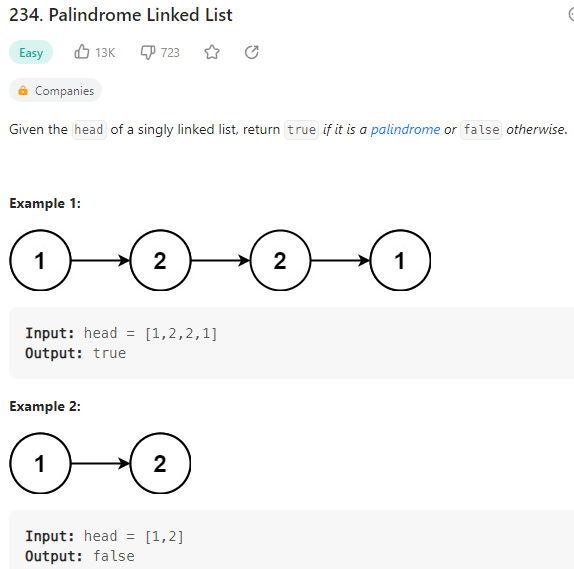

In [145]:
class Solution(object):
    def isPalindrome(self, head:List)->bool:
        """
        :type head: ListNode
        :rtype: bool
        """
        len_head = len(head)
        half_index = int(len_head/2)
        if (len_head > 3 and (len_head % 2 == 0)):           
            first_half=head[:half_index]
            second_half=head[half_index:]
            second_half.reverse()
            if first_half == second_half:
                return True
            else:
                return False
        else:
            return False
        
        

In [146]:
head = [1,2,3,3,2,1]
Solution().isPalindrome(head)

True

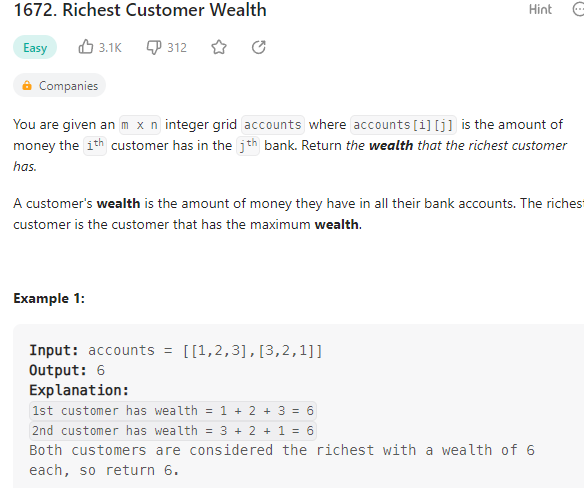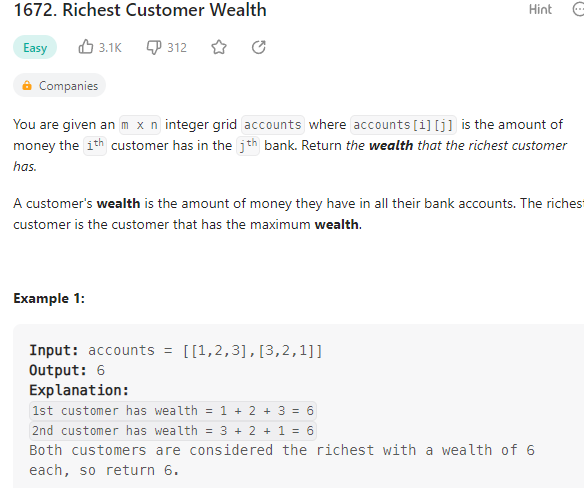

In [171]:
class Solution(object):
    def maximumWealth(self, accounts:List[List[int]])->int:
        """
        :type accounts: List[List[int]]
        :rtype: int
        """
        wealth = 0
        client = 0
        for i in (range(len(accounts))):
            if (sum(accounts[i])) > wealth:
                wealth = sum(accounts[i])
                client = i
        return client+1, wealth

In [ ]:
class Solution:
    def maximumWealth(self, accounts: List[List[int]]) -> int:
        return max([sum(acc) for acc in accounts])

In [172]:
accounts=[[1,2,3],[3,2,1]]
_client, _wealth = Solution().maximumWealth(accounts)
print(f'The {_client} client has a wealth of {_wealth}')

The 1 client has a wealth of 6
